# 1- Basit Doğrusal Regresyon / Simple Linear Regression

## TEORİ

**Temel amaç, bağımlı ve bağımsız değişken arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulmaktır.**
* Doğrusal Regresyon, belirli bir bağımsız değişkene dayalı olarak bir bağımlı değişkeni tahmin eder. Böylece iki değişken arasında doğrusal ilişki bulunur.
* Hata kareler toplamını minimize edecek katsayı tahminlerini bulmaya çalışarak yapılır.
* Basit linear regresyon genelde gözlem sayısı az olan verisetlerinde uygulanır.
* Bağımlı ve bağımsız değişkenlerin adetleri 1 olmalı ve sürekli değişkenlerden seçilmelidir.

## UYGULAMA

### Verisetinin İncelenmesi ve Manipule Edilmesi

* Kullanılan kütüphanelerin dahil edilmesi

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore", category = UserWarning)

* Veri setinin yüklenmesi ve incelenmesi

Verisetini [buradan](https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/Advertising.csv) indirebilirsiniz.

In [2]:
url = "https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/Advertising.csv"

ad = pd.read_csv(url)
df = ad.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df = df.iloc[:,1:len(df)] # index sütunun düzenlenmesi
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.isnull().values.any() # veri setinde eksik degerler var mı?

False

In [5]:
df.info() # veriseti hakkında bilgiler verir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
# görüldügü üzere tüm degiskenler süreklidir.
# 3 bagımsız degişken ve 1 bagımlı degisken vardır.

In [7]:
df.describe().T # verisetinin dagılımı hakkında bilgi verir

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [8]:
df.corr() # Degiskenler araınsndaki korelasyon durumları

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


* Korelasyon, iki veya daha fazla değişken arasında bir ilişki olup olmadığını, eğer ilişki var ise bu ilişkinin miktarını ve yönünü sayısal olarak belirleyen istatistiksel bir tekniktir. İki değişken arasındaki ilişkinin derecesine ise korelasyon katsayısı denir.
+ Korelasyon katsayısı -1 ile +1 arasında değer alır. Korelasyon katsayısının pozitif (+) olması durumunda değişenler aynı yönde değişim göstermiş demektir, negatif (-) olması durumunda ise iki değişken arasında ters bir ilişki oldugunu gösterir.

* Örnek yorum, TV ve sales arasında 0.78 derecede pozitif yönde artan bir korelasyon vardır.

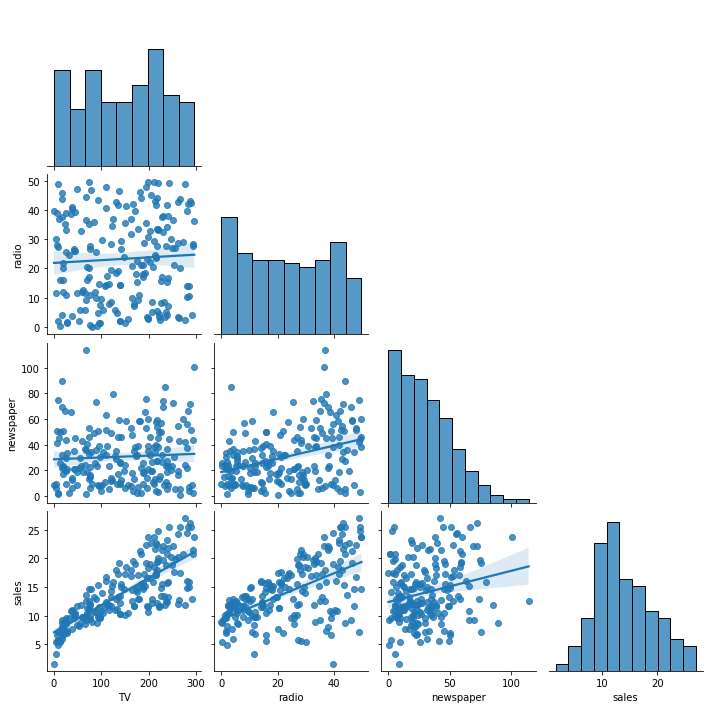

In [9]:
# verisetini daha iyi gözlemlemek icin verilerin görselleştirilmesi 
sns.pairplot(df, kind = 'reg', corner = True);

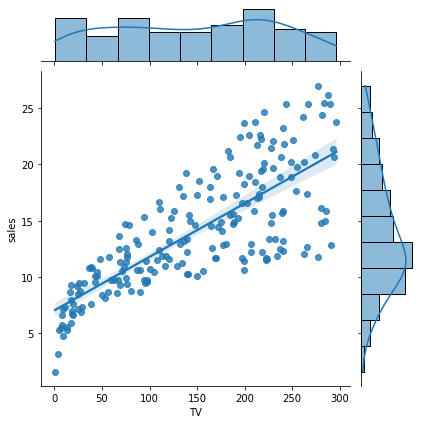

In [10]:
sns.jointplot(x = 'TV', y = 'sales', data = df, kind = 'reg');

### Statsmodels ile Modelleme

#### Model Kurulumu

In [11]:
# 1. yol
X_tv = df[["TV"]] # bagımsız degisken
y = df["sales"] # bagımlı degisken

In [12]:
X_tv.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [13]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [14]:
# model nesnesinin olusturulması ve fit edilmesi,
X_tv = sm.add_constant(X_tv) # sabit katsayı ekler (model bu sekilde olusturuluyorsa sabit sayı eklenmeli!)
lm_tv = sm.OLS(y, X_tv) # Nesne modeli olusturur
model_tv = lm_tv.fit() # olusturulan modeli fit eder.

In [15]:
model_tv.summary() # olusturulan model hakkında bigi cıktısını verir.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 18 Feb 2022   Prob (F-statistic):           1.47e-42
Time:                        01:26:19   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Tablodaki önemli değerlerin incelenmesi,
* R-squared: Bağımsız değişkenin bağımlı değişkendeki değişkenliği açıklama başarısıdır.
* Adj. R-squared: R-squared değerinin duyarlılığı.
* F-statistic: Modelin anlamlılığının anlaşılması için kurulan test istatistiğinin değeri
* p value: Modelin anlamlılığını gösterir < 0.05 ise bu model anlamlıdır.
* constant: B0, coef: B1 (katsayı değerleri)

In [16]:
# Kurulan modelin parametrelerine erisilmesi,

In [17]:
model_tv.params

const    7.032594
TV       0.047537
dtype: float64

In [18]:
model_tv.summary().tables[1] # 1.tabloyu verir. (katsayılar tablosu)

,coef,std err,t,P>|t|,[0.025,0.975]
const,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [19]:
model_tv.conf_int() # katsayıların güven aralıkları

,0,1
const,6.129719,7.935468
TV,0.042231,0.052843


In [20]:
model_tv.f_pvalue # p value değeri

1.4673897001947095e-42

In [21]:
# p value degerini daha iyi okumak icin,
print(f"P-value: %.10f"  %model_tv.f_pvalue) # 0.05'den kuçuk ise model anlamlıdır

P-value: 0.0000000000


In [22]:
model_tv.rsquared * 100 # modelin basarı yüzdesi

61.187505085007096

In [23]:
# 2. yol modelleme,
# model nesnesinin olusturulması ve fit edilmesi,
# bagımlı degisken: sales, bagımsız degisken: TV
lm2 = smf.ols(formula = 'sales ~ TV', data = df)
model2 = lm2.fit()
model2

In [24]:
model2.summary() # modelin bilgileri

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 18 Feb 2022   Prob (F-statistic):           1.47e-42
Time:                        01:26:19   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# modelin parametrelerine erisme,

In [26]:
model2.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [27]:
model2.rsquared * 100 # modelin basarı degeri

61.187505085007096

In [28]:
# Sonuç: İki modelde de sonuclar neredeyse aynı, bu nedenle uygulama alanlarında herhangi birinin kullanılması farketmez!

#### Tahminleme

In [29]:
model_tv.fittedvalues[0:5] # gercek X degerleri üzerinden tahmin edilen y (sales) degerleri

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [30]:
model_tv.predict()[0:5] # tahminlere farklı fonksiyondan erişme

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814])

In [31]:
y[0:5] # gercek y degerleri

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

* Örnek, TV harcamalarına 180 birim harcama yapıldığında tahmini satış degeri ne kadar artar?

In [32]:
model_tv.predict([[1, 180]]) # sabit degerin katsayısı 1 olarak girilmelidir

array([15.58918883])

In [33]:
# modelin hata degerleri,
ypred = model_tv.predict(X_tv) # gervek y degerleri üzerinden tahmin edilen y degerleri
mse = mean_squared_error(y, ypred) # hataların ortalaması (MSE)
rmse_stats = np.sqrt(mse) # test hata degeri

In [34]:
rmse_stats # [önemli]

3.2423221486546883

In [35]:
r2_stats = r2_score(y, ypred) # modelin basarı degeri (r-squared)

In [36]:
r2_stats * 100 # modelin basarı yüzdesi [önemli]

61.18750508500712

In [37]:
# modelin matematiksel denkleminin oluşturulması,
denklem_tv = "Sales = " + str("%.5f" %model_tv.params[0]) + " + TV * " + str("%.5f" %model_tv.params[1])
denklem_tv

'Sales = 7.03259 + TV * 0.04754'

In [38]:
print("Model Denklemi: ", denklem_tv)
print("Modelin Hata Degeri: ", rmse_stats)
print("Olusturulan Modelin Basarı Yüzdesi: ", r2_stats * 100)

Model Denklemi:  Sales = 7.03259 + TV * 0.04754
Modelin Hata Degeri:  3.2423221486546883
Olusturulan Modelin Basarı Yüzdesi:  61.18750508500712


#### Görselleştirme

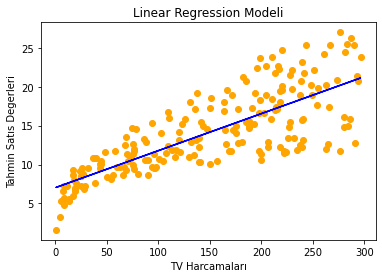

In [39]:
plt.scatter(np.array(X_tv["TV"]), y, color = 'orange');
plt.plot(np.array(X_tv["TV"]), model_tv.predict(), color = 'blue')
plt.title('Linear Regression Modeli')
plt.xlabel('TV Harcamaları')
plt.ylabel('Tahmin Satıs Degerleri');

### ScikitLearn ile Modelleme

#### Model Kurulumu

In [40]:
# model nesnesinin olusturulması ve fit edilmesi,
# bagımsız degisken: TV, bagımlı degisken: sales
Xtv = df[['TV']]
y = df[['sales']]
regtv = LinearRegression()
modeltv = regtv.fit(Xtv, y)

In [41]:
modeltv.intercept_ # sabit degeri

array([7.03259355])

In [42]:
modeltv.coef_ # bagımsız degiskenin katsayısı

array([[0.04753664]])

#### Tahminleme

In [43]:
modeltv.predict(Xtv)[0:5] # Xtv üzerinden tahmin edilen y (sales) degerleri

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814]])

* Örnek, 30 birim TV reklam harcamalarında tahmini satış değeri ne kadar artar?

In [44]:
modeltv.intercept_ + 30 * modeltv.coef_[0] # (uzun yol)

array([8.45869276])

In [45]:
# sklearn üzerinden tahmin (kısa yol),
modeltv.predict([[30]]) # 1 şirket icin tahmin degeri

array([[8.45869276]])

In [46]:
modeltv.predict([[5], [90], [200]]) # 3 şirket yatırım yapabilir

array([[ 7.27027675],
       [11.31089119],
       [16.53992164]])

In [47]:
# modelin hata degerleri
ypred = modeltv.predict(Xtv)
mse = mean_squared_error(y, ypred) # MSE
rmse_sklearn = np.sqrt(mse) # RMSE

In [48]:
rmse_sklearn # [önemli]

3.2423221486546887

In [49]:
r2_sklearn = r2_score(y, modeltv.predict(Xtv)) # Olusturulan modelin  basarı degeri

In [50]:
r2_sklearn * 100 # modelin basarı yüzdesi [önemli]

61.187505085007096

In [51]:
denklemtv = "Sales = " + str(modeltv.intercept_[0]) + " + TV * " + str(modeltv.coef_[0][0])

In [52]:
print("Modelin Denklemi: " + denklemtv)
print("Modelin Hata Degeri: ", rmse_sklearn)
print("Olusturulan Modelin Basarı Yüzdesi: ", r2_sklearn * 100)

Modelin Denklemi: Sales = 7.032593549127695 + TV * 0.04753664043301975
Modelin Hata Degeri:  3.2423221486546887
Olusturulan Modelin Basarı Yüzdesi:  61.187505085007096


#### Görselleştirme

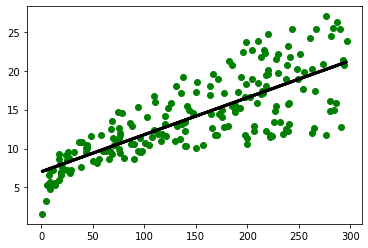

In [53]:
plt.scatter(Xtv, y, color = 'green')
plt.plot(np.array(Xtv), modeltv.predict(Xtv), color = 'black', linewidth = 3);

### Artıklar/Hatalar ve Makine Öğrenmesindeki Önemi 

In [54]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [55]:
X_ = df[["TV"]] # bagımsız degisken
y_ = df["sales"] # bagımlı degisken

In [56]:
X_.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [57]:
y_.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [58]:
# model nesnesinin olusturulması ve fit edilmesi
reg = LinearRegression()
model = reg.fit(X_, y_)
model

LinearRegression()

In [59]:
model.intercept_ # sabit deger

7.032593549127695

In [60]:
model.coef_ # bagımsız degerin katsayı degeri

array([0.04753664])

In [61]:
y_pred = model.predict(X_) # gercek X degerleri üzerinden tahmin edilen y degerleri
y_pred[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [62]:
# Hata degerlerinin manuel bulunması,
tablo = pd.DataFrame({'gercek_y': y_,
                   'tahmin_y': y_pred})
tablo.head(10)

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [63]:
tablo["hata"] = tablo["gercek_y"] - tablo["tahmin_y"] # hataların farkı
tablo.head(10)

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [64]:
tablo["hata_kare"] = tablo["hata"] ** 2 # hataların karesi
tablo.head(10)

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [65]:
np.sum(tablo["hata_kare"]) # hata karelerinin toplamı

2102.5305831313512

In [66]:
mse = np.mean(tablo["hata_kare"]) # hata karelerin ortalaması (MSE)

In [67]:
mse

10.512652915656757

In [68]:
rmse = np.sqrt(np.mean(tablo["hata_kare"])) # hata karelerin ortalamasının karekökü (RMSE)

In [69]:
rmse # [önemli]

3.2423221486546887

In [70]:
r2_score(y_, y_pred) # [önemli]

0.611875050850071

In [71]:
print("Hataların ortalaması (MSE): %.7f" %mse)
print("Hataların ortalamasının karekökü (RMSE): ", rmse)

Hataların ortalaması (MSE): 10.5126529
Hataların ortalamasının karekökü (RMSE):  3.2423221486546887


In [72]:
# modelin hatasını direkt sunmak aldatıcıdır! Hataların dağılımına bakmak gerekir.
# %95 güven aralığıyla şu şekilde hata payı var vs. diyerek sunulur.

### Egitim ve Test Seti Üzerinden Modelleme

#### Model Kurulumu

In [73]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [74]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [75]:
# Degiskenlerin %80'i egitim seti, %20'si test seti olarak secilir.

X = df[['TV']] # bagımsız degisken 
y = df[['sales']] # bagımlı degisken

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.20,
                                                   random_state = 0)

In [76]:
# model egitim seti üzerinden kurulur.
reg = LinearRegression()
model = reg.fit(X_train, y_train)
model

LinearRegression()

In [77]:
X_train.shape, X_test.shape

((160, 1), (40, 1))

In [78]:
y_train.shape, y_test.shape

((160, 1), (40, 1))

In [79]:
# Modelin parametreleri,

In [80]:
model.intercept_ # sabit deger

array([7.29249377])

In [81]:
model.coef_ # katsayı degeri

array([[0.04600779]])

In [82]:
model.score(X_train, y_train) # Modelin basarı degeri

0.5884742462828709

In [83]:
denklem = "Sales = " + str(model.intercept_[0]) + " + TV * " + str(model.coef_[0][0])
denklem

'Sales = 7.292493773559364 + TV * 0.046007789603017164'

#### Tahminleme

In [84]:
# Kurulan model üzerinden tahmin yapılarak test hatası elde edilir.
ypred = model.predict(X_test)
mse = mean_squared_error(y_test, ypred)
rmse = np.sqrt(mse)

In [85]:
mse # hataların ortalaması

10.18618193453022

In [86]:
rmse # hata oranı [önemli]

3.191579849311344

In [87]:
rscore = r2_score(y_test, ypred) # [önemli]

In [88]:
rscore * 100 # egitim seti üzerinde uygulanan tahmin degerlerinin dogrulugunun basarı yüzdesi

67.6315157793972

In [89]:
print("Model Denklemi: ", denklem)
print("Modelin Hata Degeri: ", rmse)
print("Olusturulan Modelin Basarı Yüzdesi: ", rscore * 100)

Model Denklemi:  Sales = 7.292493773559364 + TV * 0.046007789603017164
Modelin Hata Degeri:  3.191579849311344
Olusturulan Modelin Basarı Yüzdesi:  67.6315157793972


### Görselleştirme

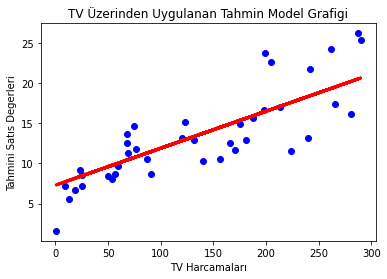

In [90]:
plt.scatter(np.array(X_test), y_test, color = 'blue')
plt.plot(np.array(X_test), np.array(ypred), color = 'red', linewidth = 3)
plt.title('TV Üzerinden Uygulanan Tahmin Model Grafigi')
plt.xlabel('TV Harcamaları')
plt.ylabel('Tahmini Satıs Degerleri');

## SONUÇ

* Statsmodels ile elde edilen degerler,
    * Model Denklemi:  Sales = 7.03259 + TV * 0.04754
    * Modelin Hata Degeri:  **3.2423221486546883**
    * Olusturulan Modelin Basarı Yüzdesi:  **61.18750508500712**

* ScikitLearn ile elde edilen degerler,
    * Modelin Denklemi: Sales = 7.032593549127695 + TV * 0.04753664043301975
    * Modelin Hata Degeri:  **3.2423221486546887**
    * Olusturulan Modelin Basarı Yüzdesi:  **61.187505085007096**

* Egitim ve test seti üzerinden elde edilen degerler
    * Model Denklemi:  Sales = 7.292493773559364 + TV * 0.046007789603017164
    * Modelin Hata Degeri:  **3.191579849311344**
    * Olusturulan Modelin Basarı Yüzdesi:  **67.6315157793972**

* Manuel elde edilen degerler,
    * Hataların ortalaması (MSE): **10.5126529**
    * Hataların ortalamasının karekökü (RMSE):  **3.2423221486546887**